## 0. Importing PyTorch and setting up device-agnostic code

## 1. Data Preparation 

In [24]:
import torch
from torch import nn

In [25]:
"""Commented this just to check the path for datasets"""
from pathlib import Path
import os

# # Setup path to data folder
image_path = Path("asl_alphabet_train")
test_image_path = Path("asl_alphabet_test")

def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)
walk_through_dir(test_image_path)


There are 29 directories and 0 images in 'asl_alphabet_train'.
There are 0 directories and 4964 images in 'asl_alphabet_train/R'.
There are 0 directories and 4985 images in 'asl_alphabet_train/U'.
There are 0 directories and 4951 images in 'asl_alphabet_train/I'.
There are 0 directories and 4896 images in 'asl_alphabet_train/N'.
There are 0 directories and 4837 images in 'asl_alphabet_train/G'.
There are 0 directories and 4299 images in 'asl_alphabet_train/Z'.
There are 0 directories and 5036 images in 'asl_alphabet_train/T'.
There are 0 directories and 5054 images in 'asl_alphabet_train/S'.
There are 0 directories and 5458 images in 'asl_alphabet_train/A'.
There are 0 directories and 5029 images in 'asl_alphabet_train/F'.
There are 0 directories and 5096 images in 'asl_alphabet_train/O'.
There are 0 directories and 4897 images in 'asl_alphabet_train/H'.
There are 0 directories and 3742 images in 'asl_alphabet_train/del'.
There are 0 directories and 3030 images in 'asl_alphabet_train/n

## 2. Data Visualization

Random image path: ASL_Alphabet_Dataset/asl_alphabet_train/N/N (1104).jpg
Image Class: N
Image Height: 200
Image Width: 200


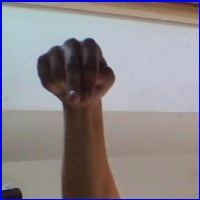

In [26]:
from pathlib import Path
import os
import random
from PIL import Image

# random.seed(42)
image_path = Path("ASL_Alphabet_Dataset")
image_path_list = list(image_path.glob("*/*/*.jpg"))
# print(len(image_path_list))
random_image_path = random.choice(image_path_list)
# print(random_image_path)
# the image class is the name of the directory where iamges resides
image_class = random_image_path.parent.stem
# print(image_class)

img = Image.open(random_image_path)

# Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image Height: {img.height}')
print(f'Image Width: {img.width}')
img

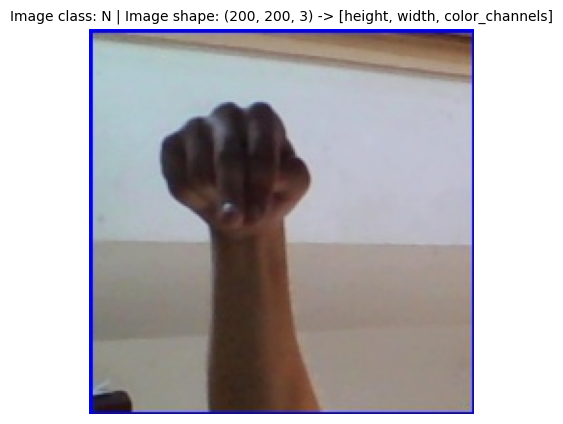

In [27]:
# Visualizing using matplotliib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
fig = plt.figure(figsize=(6, 5))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]", fontsize = 10)
plt.axis(False)
plt.show()

In [28]:
img_as_array

array([[[  0,   4, 254],
        [  0,   4, 252],
        [  0,   1, 244],
        ...,
        [  6,   0, 248],
        [  0,   2, 244],
        [  0,   5, 246]],

       [[  0,   1, 252],
        [  0,   3, 235],
        [  7,   6, 204],
        ...,
        [ 12,   1, 191],
        [ 11,   9, 214],
        [  2,   6, 219]],

       [[  9,   0, 248],
        [ 12,   5, 207],
        [110, 108, 218],
        ...,
        [ 99,  77, 150],
        [ 86,  70, 202],
        [ 18,   8, 167]],

       ...,

       [[  4,   0, 245],
        [  9,   6, 197],
        [ 26,  24, 108],
        ...,
        [148, 137, 153],
        [141, 135, 225],
        [ 18,  13, 141]],

       [[  2,   2, 248],
        [  4,   4, 212],
        [ 19,  17, 153],
        ...,
        [139, 133, 221],
        [125, 123, 255],
        [ 12,  12, 168]],

       [[  0,   2, 247],
        [  2,   2, 220],
        [ 14,  12, 175],
        ...,
        [ 16,  11, 137],
        [ 13,  12, 168],
        [  8,  10, 181]]

## 3. Transforming data

In [29]:
!pip3 install torchvision

In [30]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transform pipeline for MLP model
data_transform = transforms.Compose([
    transforms.Grayscale(),         # Ensure single color channel
    transforms.Resize((128, 128)),    # Resize to 128x128 pixels
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

# Paths for train and test datasets
train_data = datasets.ImageFolder(root=image_path, transform=data_transform)
#test_data = datasets.ImageFolder(root=test_image_path, transform=data_transform)

# Data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
#test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


## 4. Loading data with ImageFolder and Split into Train and Test Data

In [31]:
# Setup source directory
source_dir = 'asl_alphabet_train'

source_data = datasets.ImageFolder(root = source_dir,
                                  transform = data_transform, # Transforms input data into tensors
                                  target_transform = None)    # Transform labels into none

source_data

Dataset ImageFolder
    Number of datapoints: 138118
    Root location: asl_alphabet_train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

In [32]:
from torch.utils.data import random_split

train_size = int(0.8 * len(source_data))
test_size = len(source_data) - train_size

# Split the dataset into train and test sets
train_data, test_data = random_split(source_data, [train_size, test_size])

print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 110494
Test set size: 27624


In [33]:
# Get class names as list and dict 
class_names = source_data.classes
class_dict = source_data.class_to_idx
class_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [34]:
# Index on the train_data Dataset to get a single iamge and label
img, label = train_data[0][0], train_data[0][1]

img, img.dtype, label, type(label), class_names[label]

(tensor([[[-0.7569, -0.7647, -0.7725,  ..., -0.7647, -0.7725, -0.7647],
          [-0.7647, -0.4510, -0.3255,  ..., -0.4431, -0.4275, -0.6235],
          [-0.7647, -0.2941, -0.1059,  ..., -0.4353, -0.4039, -0.6157],
          ...,
          [-0.7725, -0.7412, -0.7333,  ..., -0.0980, -0.0902, -0.4980],
          [-0.7725, -0.7725, -0.8039,  ..., -0.0980, -0.0902, -0.5059],
          [-0.7725, -0.7725, -0.7961,  ..., -0.4980, -0.5059, -0.6627]]]),
 torch.float32,
 19,
 int,
 'T')

In [35]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)
img.shape, img_permute.shape

(torch.Size([1, 128, 128]), torch.Size([128, 128, 1]))

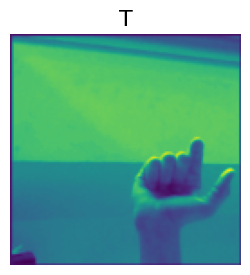

In [36]:
# Plot the image
plt.figure(figsize = (3, 3))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 16); 

## 5. Turn loaded images into Dataloaders

In [37]:
# Train and test dataloaders
from torch.utils.data import DataLoader

BATCH_SIZE = 128
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

(864, 216)

In [38]:
img, label = next(iter(train_dataloader))

img.shape, label.shape     # {img.shape} -> [batch_size, color_channels, height, width]

(torch.Size([128, 1, 128, 128]), torch.Size([128]))

In [39]:
!pip3 install torch

## 6. Transfer Learning using `MLP`

In [63]:
import torch.nn as nn

class MLPModel(nn.Module):
    def __init__(self, input_size, num_classes, dropout_prob=0.3):
        super(MLPModel, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(input_size, 512)
        self.dropout1 = nn.Dropout(p=dropout_prob)  # Dropout after layer 1
        self.layer2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(p=dropout_prob)  # Dropout after layer 2
        self.layer3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(p=dropout_prob)  # Dropout after layer 3
        self.output = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)  # Apply dropout after ReLU
        x = torch.relu(self.layer2(x))
        x = self.dropout2(x)  # Apply dropout after ReLU
        x = torch.relu(self.layer3(x))
        x = self.dropout3(x)  # Apply dropout after ReLU
        x = self.output(x)
        return x

# Define input size and number of classes based on ASL dataset
input_size = 128 * 128  # Flattened image size (128x128 pixels assumed)
num_classes = 29        # Adjusted for ASL alphabet categories

# Instantiate model
model = MLPModel(input_size=input_size, num_classes=num_classes, dropout_prob=0.5)
print(model)


MLPModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16384, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=128, out_features=29, bias=True)
)


In [64]:
import torch
from PIL import Image
from torchvision import transforms

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)

# Ensure the input image tensor is also on the same device
model(img.to(device))



tensor([[ 4.2885e-02, -1.0262e-02, -2.2905e-03,  ...,  1.0191e-01,
          5.2242e-02, -1.9988e-02],
        [ 7.3465e-02, -2.9480e-04,  1.2578e-01,  ..., -6.5200e-03,
          8.0487e-03,  2.0579e-02],
        [ 4.2076e-02,  2.6327e-02,  7.3738e-02,  ...,  4.0520e-02,
          1.1630e-02, -2.3712e-02],
        ...,
        [ 1.4695e-01,  3.8502e-02, -1.1158e-02,  ...,  5.2248e-04,
          1.7087e-02, -8.1087e-02],
        [ 3.9844e-02,  3.1322e-02,  3.2320e-02,  ..., -2.7701e-05,
         -6.1245e-03, -2.7039e-02],
        [ 7.4769e-02,  6.1609e-02,  3.4899e-03,  ...,  1.0123e-01,
         -6.4273e-02, -6.3177e-03]], grad_fn=<AddmmBackward0>)

## 7. Create Train/Test Loop Function

In [65]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model, dataloader, loss_fn):
    model.eval()
    test_loss, test_acc = 0, 0

    # Turn on inference
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [43]:
!pip3 install tqdm


In [66]:
from tqdm.auto import tqdm

def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):

  # Create a empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss":[],
             "test_acc": []}

  # Loop through training and testing steps for no of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       optimizer = optimizer,
                                       loss_fn = loss_fn)

    test_loss, test_acc = test_step(model = model,
                                     dataloader = test_dataloader,
                                     loss_fn = loss_fn)

    print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} - Train acc: {(train_acc*100):.2f}% -  Test loss: {test_loss:.4f} - Test acc: {(test_acc*100):.2f}%')

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

## 8. Train and Evaluate the Model

In [67]:
# Setup loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.001, weight_decay=0.0001)

In [68]:
# Set random seed
torch.manual_seed(42)
EPOCHS = 50

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model
model_results = train(model = model,
                      train_dataloader = train_dataloader,
                      test_dataloader = test_dataloader,
                      optimizer = optimizer,
                      loss_fn = loss_fn,
                      epochs = EPOCHS)

# End the timer and print duration of training
end_time = timer()
print(f'Total Train Time: {end_time - start_time:.3f} seconds')

  2%|▏         | 1/50 [02:09<1:45:39, 129.38s/it]

Epoch: 0 | Train loss: 2.9735 - Train acc: 12.10% -  Test loss: 2.4103 - Test acc: 24.86%


  4%|▍         | 2/50 [04:20<1:44:21, 130.44s/it]

Epoch: 1 | Train loss: 2.5211 - Train acc: 21.18% -  Test loss: 2.0658 - Test acc: 34.62%


  6%|▌         | 3/50 [06:29<1:41:40, 129.80s/it]

Epoch: 2 | Train loss: 2.3296 - Train acc: 25.76% -  Test loss: 1.9921 - Test acc: 37.92%


  8%|▊         | 4/50 [08:39<1:39:33, 129.85s/it]

Epoch: 3 | Train loss: 2.2255 - Train acc: 28.54% -  Test loss: 1.8176 - Test acc: 42.53%


 10%|█         | 5/50 [10:49<1:37:25, 129.90s/it]

Epoch: 4 | Train loss: 2.1493 - Train acc: 30.65% -  Test loss: 1.7339 - Test acc: 45.34%


 12%|█▏        | 6/50 [12:59<1:35:14, 129.88s/it]

Epoch: 5 | Train loss: 2.1137 - Train acc: 31.78% -  Test loss: 1.6940 - Test acc: 46.38%


 14%|█▍        | 7/50 [15:08<1:32:59, 129.75s/it]

Epoch: 6 | Train loss: 2.0840 - Train acc: 32.87% -  Test loss: 1.6982 - Test acc: 47.14%


 16%|█▌        | 8/50 [17:19<1:30:55, 129.88s/it]

Epoch: 7 | Train loss: 2.0566 - Train acc: 33.54% -  Test loss: 1.6168 - Test acc: 50.44%


 18%|█▊        | 9/50 [19:28<1:28:45, 129.89s/it]

Epoch: 8 | Train loss: 2.0271 - Train acc: 34.57% -  Test loss: 1.6081 - Test acc: 50.54%


 20%|██        | 10/50 [21:38<1:26:33, 129.85s/it]

Epoch: 9 | Train loss: 2.0123 - Train acc: 34.97% -  Test loss: 1.5927 - Test acc: 49.80%


 22%|██▏       | 11/50 [23:48<1:24:23, 129.84s/it]

Epoch: 10 | Train loss: 1.9951 - Train acc: 35.57% -  Test loss: 1.5474 - Test acc: 51.40%


 24%|██▍       | 12/50 [25:58<1:22:10, 129.74s/it]

Epoch: 11 | Train loss: 1.9932 - Train acc: 35.82% -  Test loss: 1.5893 - Test acc: 49.89%


 26%|██▌       | 13/50 [28:08<1:20:09, 129.97s/it]

Epoch: 12 | Train loss: 1.9755 - Train acc: 36.55% -  Test loss: 1.5212 - Test acc: 51.50%


 28%|██▊       | 14/50 [30:18<1:18:03, 130.11s/it]

Epoch: 13 | Train loss: 1.9639 - Train acc: 37.00% -  Test loss: 1.5145 - Test acc: 54.13%


 30%|███       | 15/50 [32:29<1:15:53, 130.09s/it]

Epoch: 14 | Train loss: 1.9507 - Train acc: 37.19% -  Test loss: 1.5007 - Test acc: 53.03%


 32%|███▏      | 16/50 [34:38<1:13:39, 129.98s/it]

Epoch: 15 | Train loss: 1.9435 - Train acc: 37.64% -  Test loss: 1.4817 - Test acc: 54.03%


 34%|███▍      | 17/50 [36:48<1:11:26, 129.91s/it]

Epoch: 16 | Train loss: 1.9514 - Train acc: 37.36% -  Test loss: 1.4394 - Test acc: 55.03%


 36%|███▌      | 18/50 [38:58<1:09:14, 129.82s/it]

Epoch: 17 | Train loss: 1.9329 - Train acc: 37.82% -  Test loss: 1.4693 - Test acc: 55.12%


 38%|███▊      | 19/50 [41:07<1:07:03, 129.78s/it]

Epoch: 18 | Train loss: 1.9435 - Train acc: 38.01% -  Test loss: 1.4632 - Test acc: 54.73%


 40%|████      | 20/50 [43:17<1:04:53, 129.80s/it]

Epoch: 19 | Train loss: 1.9145 - Train acc: 38.50% -  Test loss: 1.4831 - Test acc: 52.88%


 42%|████▏     | 21/50 [45:27<1:02:42, 129.76s/it]

Epoch: 20 | Train loss: 1.9306 - Train acc: 38.22% -  Test loss: 1.4583 - Test acc: 55.99%


 44%|████▍     | 22/50 [47:36<1:00:31, 129.70s/it]

Epoch: 21 | Train loss: 1.9153 - Train acc: 38.73% -  Test loss: 1.4707 - Test acc: 54.17%


 46%|████▌     | 23/50 [49:46<58:21, 129.68s/it]  

Epoch: 22 | Train loss: 1.9259 - Train acc: 38.66% -  Test loss: 1.4826 - Test acc: 53.67%


 48%|████▊     | 24/50 [51:56<56:12, 129.72s/it]

Epoch: 23 | Train loss: 1.9104 - Train acc: 39.05% -  Test loss: 1.4098 - Test acc: 55.38%


 50%|█████     | 25/50 [54:06<54:08, 129.93s/it]

Epoch: 24 | Train loss: 1.9021 - Train acc: 39.21% -  Test loss: 1.4306 - Test acc: 56.53%


 52%|█████▏    | 26/50 [56:17<52:04, 130.17s/it]

Epoch: 25 | Train loss: 1.8946 - Train acc: 39.51% -  Test loss: 1.4285 - Test acc: 54.94%


 54%|█████▍    | 27/50 [58:27<49:50, 130.04s/it]

Epoch: 26 | Train loss: 1.8888 - Train acc: 39.65% -  Test loss: 1.4414 - Test acc: 56.52%


 56%|█████▌    | 28/50 [1:00:37<47:39, 129.98s/it]

Epoch: 27 | Train loss: 1.9063 - Train acc: 39.30% -  Test loss: 1.4240 - Test acc: 55.80%


 58%|█████▊    | 29/50 [1:02:46<45:25, 129.79s/it]

Epoch: 28 | Train loss: 1.8916 - Train acc: 39.70% -  Test loss: 1.4111 - Test acc: 57.70%


 60%|██████    | 30/50 [1:04:56<43:15, 129.79s/it]

Epoch: 29 | Train loss: 1.8948 - Train acc: 39.75% -  Test loss: 1.4099 - Test acc: 56.84%


 62%|██████▏   | 31/50 [1:07:05<41:03, 129.67s/it]

Epoch: 30 | Train loss: 1.8800 - Train acc: 39.96% -  Test loss: 1.3810 - Test acc: 58.30%


 64%|██████▍   | 32/50 [1:09:15<38:53, 129.65s/it]

Epoch: 31 | Train loss: 1.8789 - Train acc: 39.93% -  Test loss: 1.3891 - Test acc: 58.43%


 66%|██████▌   | 33/50 [1:11:24<36:43, 129.63s/it]

Epoch: 32 | Train loss: 1.8849 - Train acc: 39.92% -  Test loss: 1.3604 - Test acc: 56.62%


 68%|██████▊   | 34/50 [1:13:34<34:34, 129.63s/it]

Epoch: 33 | Train loss: 1.8790 - Train acc: 39.95% -  Test loss: 1.4116 - Test acc: 56.21%


 70%|███████   | 35/50 [1:15:43<32:23, 129.55s/it]

Epoch: 34 | Train loss: 1.8934 - Train acc: 39.98% -  Test loss: 1.4443 - Test acc: 56.26%


 72%|███████▏  | 36/50 [1:17:52<30:12, 129.44s/it]

Epoch: 35 | Train loss: 1.8735 - Train acc: 40.20% -  Test loss: 1.4118 - Test acc: 57.73%


 74%|███████▍  | 37/50 [1:20:02<28:03, 129.51s/it]

Epoch: 36 | Train loss: 1.8689 - Train acc: 40.64% -  Test loss: 1.4297 - Test acc: 56.53%


 76%|███████▌  | 38/50 [1:22:11<25:53, 129.44s/it]

Epoch: 37 | Train loss: 1.8692 - Train acc: 40.70% -  Test loss: 1.4267 - Test acc: 58.69%


 78%|███████▊  | 39/50 [1:24:20<23:42, 129.31s/it]

Epoch: 38 | Train loss: 1.8761 - Train acc: 40.55% -  Test loss: 1.4325 - Test acc: 56.54%


 80%|████████  | 40/50 [1:26:30<21:34, 129.46s/it]

Epoch: 39 | Train loss: 1.8665 - Train acc: 40.53% -  Test loss: 1.3668 - Test acc: 58.08%


 82%|████████▏ | 41/50 [1:28:40<19:27, 129.68s/it]

Epoch: 40 | Train loss: 1.8689 - Train acc: 40.57% -  Test loss: 1.4034 - Test acc: 58.40%


 84%|████████▍ | 42/50 [1:30:50<17:16, 129.57s/it]

Epoch: 41 | Train loss: 1.8654 - Train acc: 40.72% -  Test loss: 1.3962 - Test acc: 58.88%


 86%|████████▌ | 43/50 [1:32:58<15:04, 129.20s/it]

Epoch: 42 | Train loss: 1.8730 - Train acc: 40.52% -  Test loss: 1.3682 - Test acc: 58.08%


 88%|████████▊ | 44/50 [1:35:08<12:56, 129.41s/it]

Epoch: 43 | Train loss: 1.8665 - Train acc: 40.67% -  Test loss: 1.3478 - Test acc: 59.74%


 90%|█████████ | 45/50 [1:37:22<10:54, 130.91s/it]

Epoch: 44 | Train loss: 1.8625 - Train acc: 40.81% -  Test loss: 1.3949 - Test acc: 57.78%


 92%|█████████▏| 46/50 [1:39:35<08:45, 131.37s/it]

Epoch: 45 | Train loss: 1.8668 - Train acc: 40.75% -  Test loss: 1.3673 - Test acc: 57.89%


 94%|█████████▍| 47/50 [1:41:45<06:32, 130.98s/it]

Epoch: 46 | Train loss: 1.8590 - Train acc: 41.01% -  Test loss: 1.4082 - Test acc: 57.81%


 96%|█████████▌| 48/50 [1:43:54<04:20, 130.49s/it]

Epoch: 47 | Train loss: 1.8513 - Train acc: 41.15% -  Test loss: 1.3495 - Test acc: 58.81%


 98%|█████████▊| 49/50 [1:46:02<02:09, 129.68s/it]

Epoch: 48 | Train loss: 1.8554 - Train acc: 41.16% -  Test loss: 1.3796 - Test acc: 58.42%


100%|██████████| 50/50 [1:48:11<00:00, 129.83s/it]

Epoch: 49 | Train loss: 1.8460 - Train acc: 41.45% -  Test loss: 1.3481 - Test acc: 59.25%
Total Train Time: 6491.229 seconds


## 9. Plot loss curves and accuracy curves

In [69]:
# Get the model key results
model_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [70]:
def plot_loss_curves(results):
    """ Plots training curves of a results dictionary """

    # Get results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

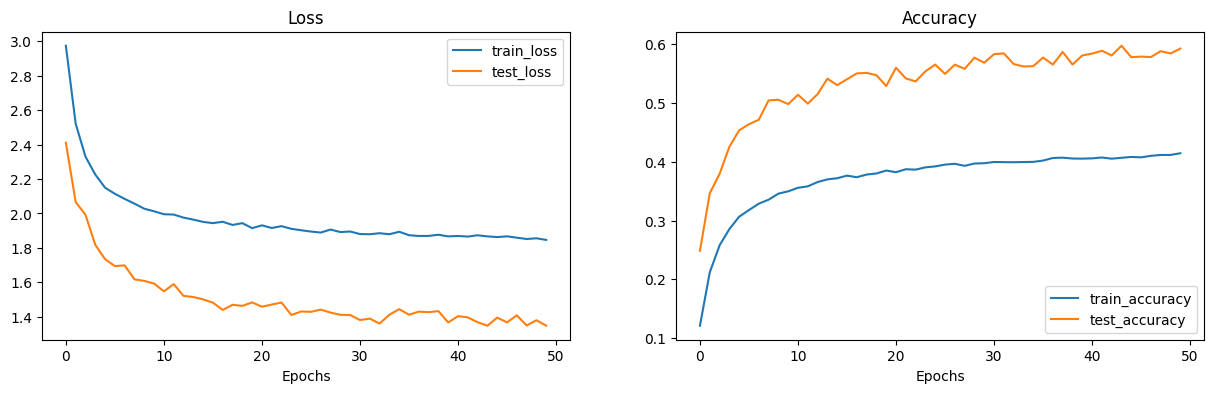

In [71]:
plot_loss_curves(model_results)

## 12. Making Predictions on Loaded Model

In [72]:
def make_predictions(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [73]:
import random

# Set the number of samples to the smaller of 30 or the available dataset size
num_samples = min(30, len(test_data))

test_samples = []
test_labels = []

# Randomly sample from test_data
for sample, label in random.sample(list(test_data), k=num_samples):
    test_samples.append(sample)
    test_labels.append(label)


In [74]:
loaded_pred_probs = make_predictions(loaded_model,
                                     test_samples,
                                     device)

loaded_pred_classes = loaded_pred_probs.argmax(dim = 1)

In [75]:
# Use the currently trained model
loaded_model = model
loaded_model.eval()  # Set to evaluation mode


MLPModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16384, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=128, out_features=29, bias=True)
)

In [76]:
def make_predictions(model, data, device):
    model.eval()
    data = data.to(device)
    with torch.no_grad():
        output = model(data)
    return output


In [77]:
# Stack list of individual samples into a single tensor
test_samples = torch.stack(test_samples).to(device)


In [78]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

class ASLDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.folder_path, self.image_files[idx])
        image = Image.open(img_name).convert("L")  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
        return image, 0  # Return 0 as placeholder label

# Usage
test_data = ASLDataset("asl_alphabet_test", transform=data_transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [79]:
def make_predictions(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_pred_probs = []

    with torch.no_grad():  # Disable gradient tracking
        for data, _ in data_loader:  # Assuming data_loader provides (inputs, labels) pairs
            data = data.to(device)  # Move the batch of inputs to the device
            output = model(data)  # Forward pass
            all_pred_probs.append(output)  # Collect predictions

    # Concatenate all predictions into a single tensor
    return torch.cat(all_pred_probs)

# Example usage
loaded_pred_probs = make_predictions(loaded_model, test_loader, device)
loaded_pred_classes = loaded_pred_probs.argmax(dim=1)


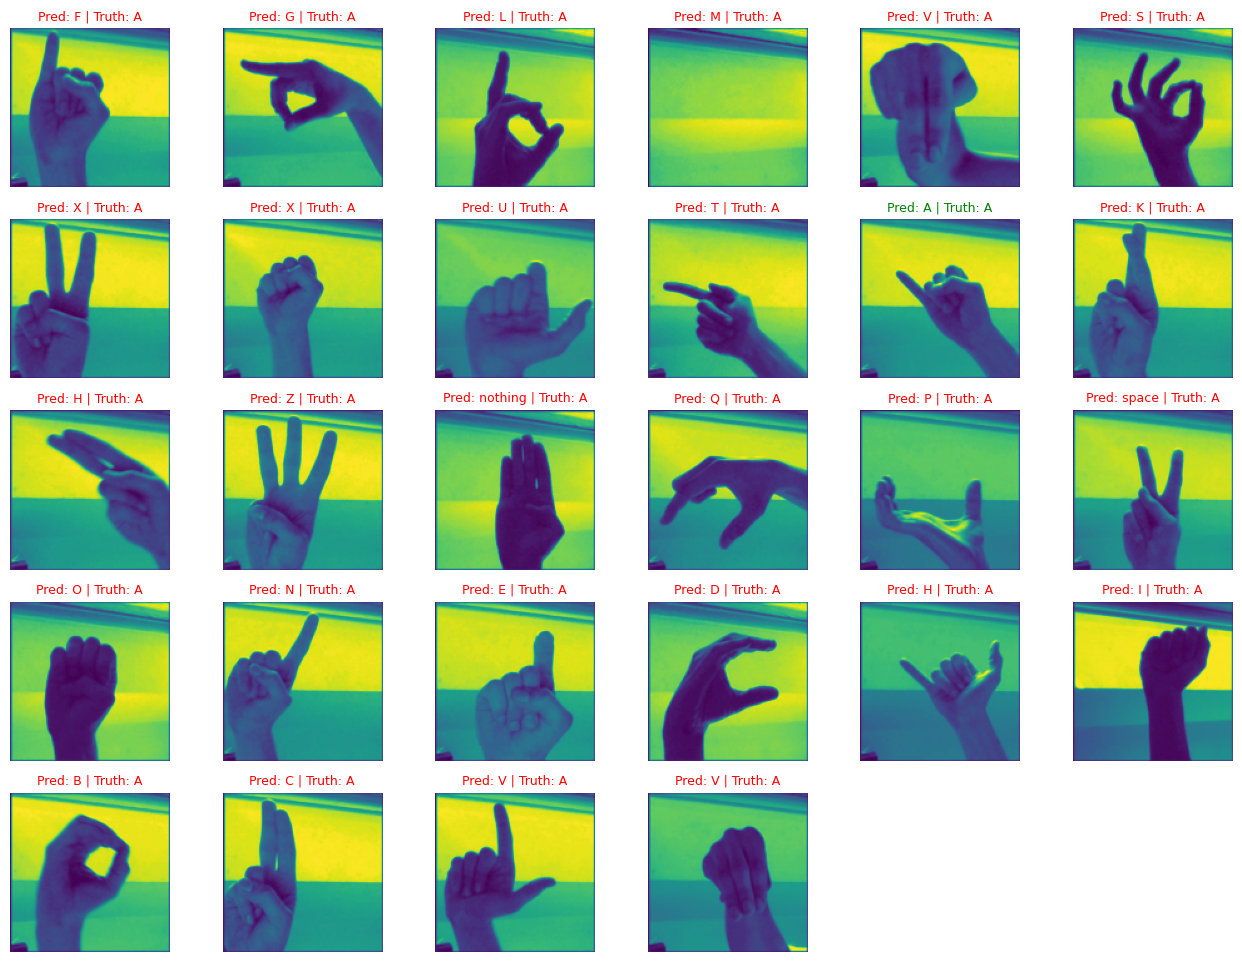

In [80]:
plt.figure(figsize=(16, 12))
nrows, ncols = 5, 6

for i, sample in enumerate(test_samples):
  class_name = np.array([
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
    'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
    'del', 'nothing', 'space'
])

  plt.subplot(nrows, ncols, i + 1)
  normalized_sample = sample.permute(1, 2, 0).numpy()
  normalized_sample = normalized_sample / 255.0
  plt.imshow(normalized_sample)

  pred_label = class_name[loaded_pred_classes[i]]
  truth_label = class_name[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"  
    
  if pred_label == truth_label:
      plt.title(title_text, fontsize=9, c="g")
  else:
      plt.title(title_text, fontsize=9, c="r")

  plt.axis(False);

In [81]:
from sklearn.metrics import f1_score

def calculate_f1(pred_classes, true_labels):
    return f1_score(true_labels, pred_classes, average='weighted')  # For multi-class classification


In [82]:
from sklearn.metrics import f1_score
import torch

def test_step_with_f1(model, dataloader, loss_fn, device):
    model.eval()
    all_preds = []
    all_labels = []

    # Turn on inference mode
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred_logits = model(X)
            test_pred_labels = test_pred_logits.argmax(dim=1)
            
            # Collect all predictions and true labels
            all_preds.extend(test_pred_labels.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    # Calculate the F1 score
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return f1

# Example usage (assuming `test_dataloader`, `model`, `loss_fn`, and `device` are defined):
f1_score_value = test_step_with_f1(model, test_dataloader, loss_fn, device)
print("F1 Score:", f1_score_value)


F1 Score: 0.6029413005782214


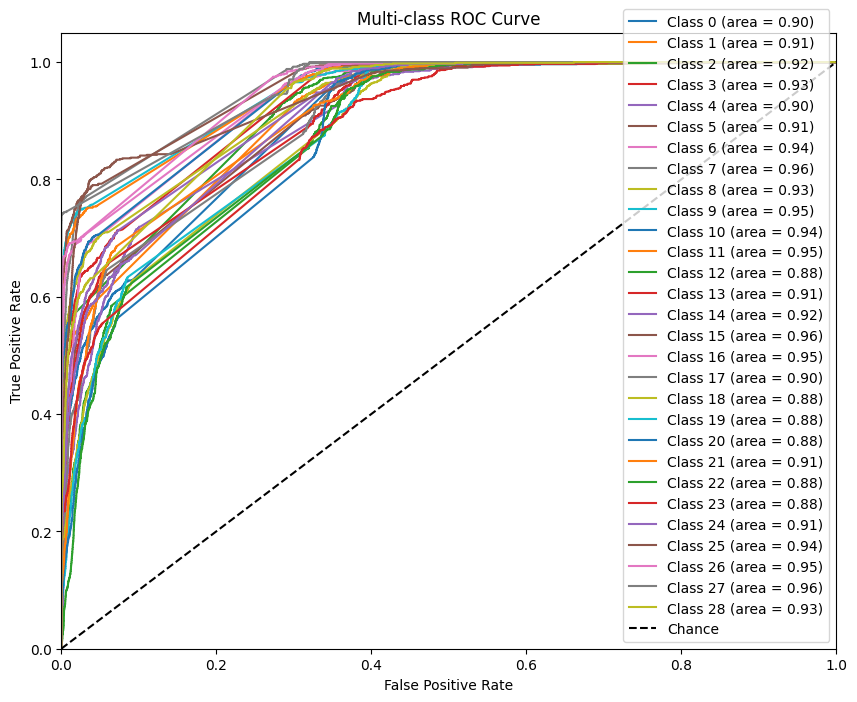

In [115]:
import numpy as np
import torch
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(model, dataloader, device, n_classes):
    # Set the model to evaluation mode
    model.eval()
    
    # Collect predictions and true labels
    all_labels = []
    all_probs = []

    # Inference and data collection
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            probs = torch.softmax(model(X), dim=1)  # Get probabilities
            all_probs.append(probs.cpu().numpy())
            all_labels.append(y.cpu().numpy())
    
    # Concatenate all predictions and labels
    all_labels = np.concatenate(all_labels)
    all_probs = np.concatenate(all_probs)
    
    # Binarize the labels for ROC curve calculation
    all_labels_binarized = label_binarize(all_labels, classes=np.arange(n_classes))
    
    # Plotting the ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (area = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Example usage (assuming `model`, `test_dataloader`, `device`, and `n_classes` are defined):
plot_multiclass_roc(model, test_dataloader, device, n_classes=29)


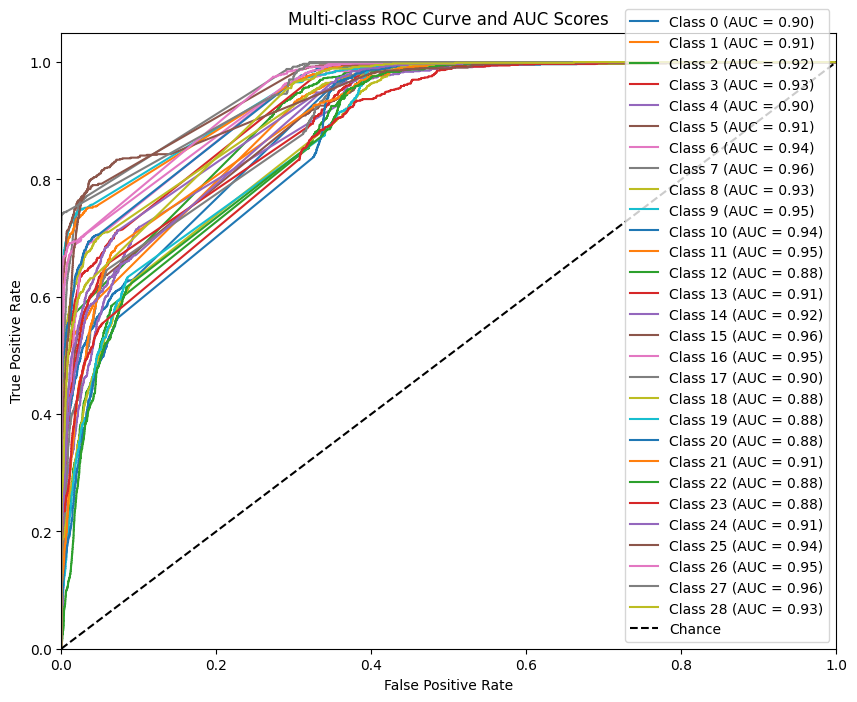

AUC Scores for each class:
Class 0: 0.90
Class 1: 0.91
Class 2: 0.92
Class 3: 0.93
Class 4: 0.90
Class 5: 0.91
Class 6: 0.94
Class 7: 0.96
Class 8: 0.93
Class 9: 0.95
Class 10: 0.94
Class 11: 0.95
Class 12: 0.88
Class 13: 0.91
Class 14: 0.92
Class 15: 0.96
Class 16: 0.95
Class 17: 0.90
Class 18: 0.88
Class 19: 0.88
Class 20: 0.88
Class 21: 0.91
Class 22: 0.88
Class 23: 0.88
Class 24: 0.91
Class 25: 0.94
Class 26: 0.95
Class 27: 0.96
Class 28: 0.93


In [116]:
import numpy as np
import torch
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc_and_auc(model, dataloader, device, n_classes):
    model.eval()
    all_labels = []
    all_probs = []

    # Collect predictions and true labels
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            probs = torch.softmax(model(X), dim=1)  # Get probabilities
            all_probs.append(probs.cpu().numpy())
            all_labels.append(y.cpu().numpy())
    
    # Concatenate all predictions and labels
    all_labels = np.concatenate(all_labels)
    all_probs = np.concatenate(all_probs)
    
    # Binarize the labels for AUC and ROC calculation
    all_labels_binarized = label_binarize(all_labels, classes=np.arange(n_classes))
    
    # Dictionary to store AUC values
    auc_values = {}

    # Plotting the ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
        roc_auc = auc(fpr, tpr)
        auc_values[f"Class {i}"] = roc_auc  # Store AUC value
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC Curve and AUC Scores")
    plt.legend(loc="lower right")
    plt.show()

    # Print AUC values for each class
    print("AUC Scores for each class:")
    for class_label, auc_score in auc_values.items():
        print(f"{class_label}: {auc_score:.2f}")

# Example usage (assuming `model`, `test_dataloader`, `device`, and `n_classes` are defined):
plot_multiclass_roc_and_auc(model, test_dataloader, device, n_classes=29)


In [83]:
from sklearn.metrics import recall_score
import torch

def calculate_recall(model, dataloader, device):
    model.eval()
    all_labels = []
    all_preds = []

    # Collect predictions and true labels
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            preds = model(X).argmax(dim=1)  # Get predicted labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    
    # Calculate recall for each class
    recall_per_class = recall_score(all_labels, all_preds, average=None)
    recall_macro = recall_score(all_labels, all_preds, average='macro')
    recall_weighted = recall_score(all_labels, all_preds, average='weighted')

    # Print recall values
    print("Recall per class:", recall_per_class)
    print(f"Macro-average Recall: {recall_macro:.2f}")
    print(f"Weighted-average Recall: {recall_weighted:.2f}")

# Example usage (assuming `model`, `test_dataloader`, and `device` are defined):
calculate_recall(model, test_dataloader, device)


Recall per class: [0.46734131 0.72769089 0.54186718 0.54340836 0.62592202 0.65259117
 0.62473573 0.70644139 0.65792129 0.72638436 0.83571429 0.71428571
 0.52916667 0.47638191 0.63113898 0.73114754 0.78036437 0.30150754
 0.51950523 0.45365854 0.46804124 0.36426117 0.25186766 0.63251232
 0.47192118 0.60620525 0.74700399 0.90646259 0.65558195]
Macro-average Recall: 0.60
Weighted-average Recall: 0.59


In [84]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import torch

def calculate_metrics(model, dataloader, device):
    model.eval()
    all_labels = []
    all_preds = []

    # Collect predictions and true labels
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            preds = model(X).argmax(dim=1)  # Get predicted labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    
    # Calculate precision, recall, and accuracy
    precision_per_class = precision_score(all_labels, all_preds, average=None)
    precision_macro = precision_score(all_labels, all_preds, average='macro')
    precision_weighted = precision_score(all_labels, all_preds, average='weighted')

    recall_per_class = recall_score(all_labels, all_preds, average=None)
    recall_macro = recall_score(all_labels, all_preds, average='macro')
    recall_weighted = recall_score(all_labels, all_preds, average='weighted')

    accuracy = accuracy_score(all_labels, all_preds)

    # Print precision, recall, and accuracy values
    print("Precision per class:", precision_per_class)
    print(f"Macro-average Precision: {precision_macro:.2f}")
    print(f"Weighted-average Precision: {precision_weighted:.2f}")
    
    print("Recall per class:", recall_per_class)
    print(f"Macro-average Recall: {recall_macro:.2f}")
    print(f"Weighted-average Recall: {recall_weighted:.2f}")

    print(f"Overall Accuracy: {accuracy:.2f}")

# Example usage (assuming `model`, `test_dataloader`, and `device` are defined):
calculate_metrics(model, test_dataloader, device)


Precision per class: [0.8089172  0.47564642 0.93677205 0.63853904 0.7324291  0.80856124
 0.76554404 0.75084175 0.7236404  0.78521127 0.41217916 0.79931973
 0.51209677 0.92217899 0.28748215 0.89319092 0.83713355 0.53285968
 0.47150259 0.54006969 0.50444444 0.47321429 0.28571429 0.28635147
 0.69020173 0.80126183 0.64705882 0.99255121 0.71688312]
Macro-average Precision: 0.66
Weighted-average Precision: 0.65
Recall per class: [0.46734131 0.72769089 0.54186718 0.54340836 0.62592202 0.65259117
 0.62473573 0.70644139 0.65792129 0.72638436 0.83571429 0.71428571
 0.52916667 0.47638191 0.63113898 0.73114754 0.78036437 0.30150754
 0.51950523 0.45365854 0.46804124 0.36426117 0.25186766 0.63251232
 0.47192118 0.60620525 0.74700399 0.90646259 0.65558195]
Macro-average Recall: 0.60
Weighted-average Recall: 0.59
Overall Accuracy: 0.59
